# SALES PREDICTION 

In [1]:
import warnings
warnings.simplefilter('ignore')
# Importing the Standard Libraries here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv(r"C:\Users\dhruvil patel\Desktop\SGP SEM-5\Train_UWu5bXk.csv")

In [3]:
print(data.shape)

(8523, 12)


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data['Item_Weight'].interpolate(inplace= True)
print(data['Item_Weight'].isna().sum())
data['Item_Weight'].sample(10)

0


3476     4.905
852     16.500
2382    16.750
7911    17.850
8513    12.000
5574     8.960
8216    18.850
7502    18.500
508      9.395
3285     6.630
Name: Item_Weight, dtype: float64

In [8]:
print(data['Outlet_Size'].isna().sum())

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace= True)

print(data['Outlet_Size'].isna().sum())

2410
0


In [10]:
print(f'Number of unique values in "Estd.Year" is: {data.Outlet_Establishment_Year.nunique()}')
print(data.Outlet_Establishment_Year.value_counts(dropna= False))

Number of unique values in "Estd.Year" is: 9
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


In [11]:
data['Outlet_Establishment_Year']= data.Outlet_Establishment_Year.astype('object')
print(data.Outlet_Establishment_Year.dtype)

object


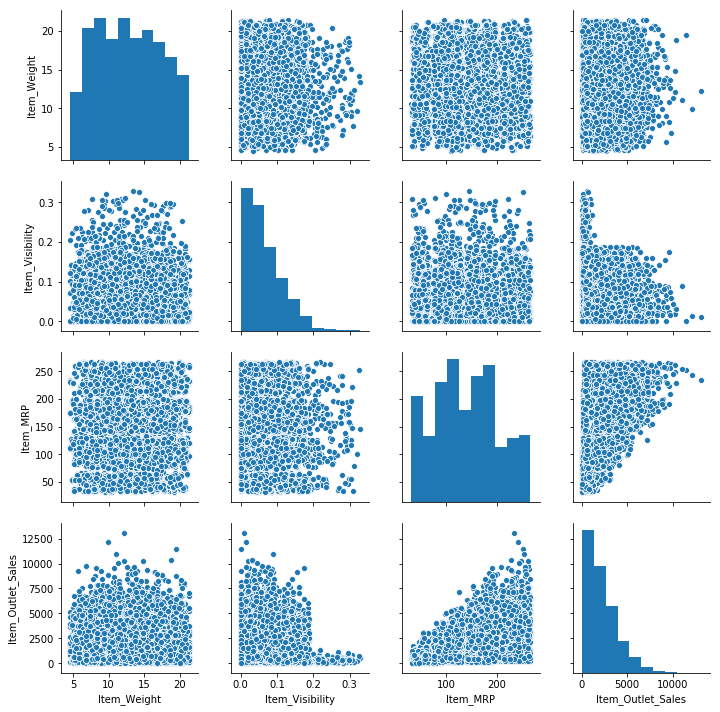

In [12]:
num_cols= [*data.select_dtypes(['int64', 'float64']).columns]

sns.pairplot(data[num_cols])

In [13]:
num_cols.remove('Item_Outlet_Sales')
num_cols


['Item_Weight', 'Item_Visibility', 'Item_MRP']

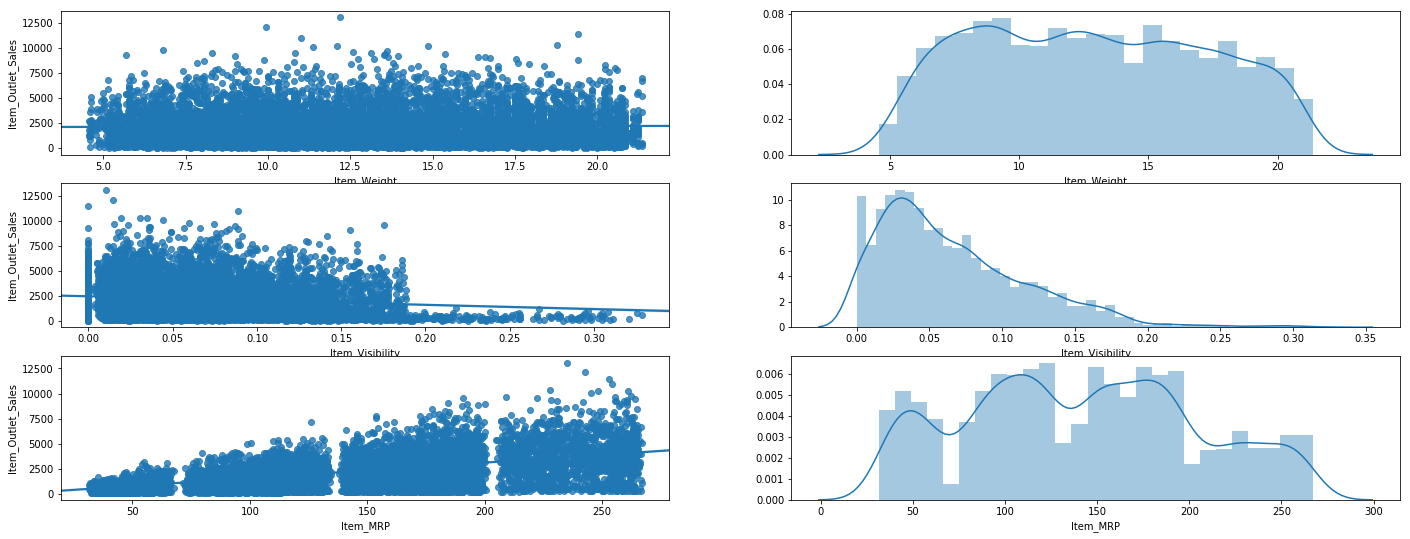

In [14]:
plt.figure(figsize= (24, 9))

count= 1

for col in num_cols:
    
    plt.subplot(3, 2, count)
    
    sns.regplot(x= col, y= 'Item_Outlet_Sales', data= data)
    
    plt.xlabel(col)
    
    count+=1
    
    plt.subplot(3, 2, count)
    
    sns.distplot(data.loc[data[col].notnull(), col])
    
    count+= 1

In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
obj_cols= [*data.select_dtypes('object').columns]

obj_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
for col in obj_cols:
    
    if data[col].nunique() > 10:
        print(f'Number of unique values in {col} is {data[col].nunique()} so not printing values.')
        print(" ")
    else:
        
        print(f'Values in {col} are: \n {data[col].value_counts()}')
        print(" ")

Number of unique values in Item_Identifier is 1559 so not printing values.
 
Values in Item_Fat_Content are: 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Number of unique values in Item_Type is 16 so not printing values.
 
Values in Outlet_Identifier are: 
 OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Values in Outlet_Establishment_Year are: 
 1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
 
Values in Outlet_Size are: 
 Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
 
Values in Outlet_Location_Type are: 
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
 
Values in Outlet_Type are: 
 Supermarket Typ

In [18]:
data['Item_Fat_Content'].value_counts(dropna= False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace= True)

# We will check the values again
data['Item_Fat_Content'].value_counts(dropna= False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
print(data['Item_Identifier'].sample(10)) # Let's try extracting the first three letters from the variable and check if there's a pattern

print(data['Item_Identifier'].str[:3].value_counts(dropna= False)) # looks like there are 71 values

print(data['Item_Identifier'].str[:2].value_counts(dropna= False)) # looks like there are only 3 values if we extract 2 letters

data['Item_Identifier']= data['Item_Identifier'].str[:2]

5117    NCS06
5072    FDK58
7483    FDG04
2476    NCE54
6891    FDE23
1402    NCI31
7047    FDM04
4910    FDK28
3546    NCN07
539     NCL19
Name: Item_Identifier, dtype: object
FDX    295
FDT    281
FDS    279
FDR    275
FDY    271
FDW    271
FDV    270
FDZ    264
FDU    263
FDB    245
FDA    245
FDQ    241
FDO    233
FDP    228
FDH    223
FDC    219
FDD    218
FDL    213
FDG    213
FDK    207
FDI    206
FDN    199
FDE    199
FDF    197
FDJ    194
FDM    176
NCO     93
NCN     88
NCM     82
NCP     81
      ... 
NCR     63
DRD     63
NCJ     62
NCE     59
NCS     59
NCX     59
NCB     58
NCZ     56
NCY     56
NCH     54
NCF     52
NCA     52
NCV     52
NCU     50
DRL     50
NCD     49
NCC     48
NCT     47
NCW     45
NCG     43
DRM     43
DRC     37
DRN     34
DRB     25
DRA     21
DRO     14
DRP     12
DRZ     11
DRQ      7
DRY      6
Name: Item_Identifier, Length: 71, dtype: int64
FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64


In [21]:
data['Item_Fat_Content']= np.where(data['Item_Identifier']== 'NC', 'Non-durable', data['Item_Fat_Content'])
data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6472,FD,12.150000,Low Fat,0.131180,Frozen Foods,245.2460,OUT046,1997,Small,Tier 1,Supermarket Type1,3202.4980
6010,FD,7.000000,Low Fat,0.151713,Canned,104.8280,OUT045,2002,Medium,Tier 2,Supermarket Type1,1278.3360
5894,FD,15.375000,Regular,0.000000,Meat,98.2042,OUT019,1985,Small,Tier 1,Grocery Store,198.4084
2952,DR,12.650000,Low Fat,0.063246,Soft Drinks,159.2578,OUT017,2007,Medium,Tier 2,Supermarket Type1,2406.8670
6505,FD,13.383333,Low Fat,0.052555,Snack Foods,190.3504,OUT027,1985,Medium,Tier 3,Supermarket Type3,1917.5040
1831,FD,15.100000,Regular,0.099839,Fruits and Vegetables,143.3786,OUT035,2004,Small,Tier 2,Supermarket Type1,1733.7432
6936,NC,9.566667,Non-durable,0.010315,Household,208.4954,OUT027,1985,Medium,Tier 3,Supermarket Type3,3751.1172
116,FD,16.850000,Regular,0.160760,Frozen Foods,192.4478,OUT017,2007,Medium,Tier 2,Supermarket Type1,4843.6950
8456,NC,7.725000,Non-durable,0.029131,Household,123.8414,OUT045,2002,Medium,Tier 2,Supermarket Type1,487.3656
5588,FD,5.940000,Low Fat,0.034957,Canned,177.1344,OUT045,2002,Medium,Tier 2,Supermarket Type1,2854.9504


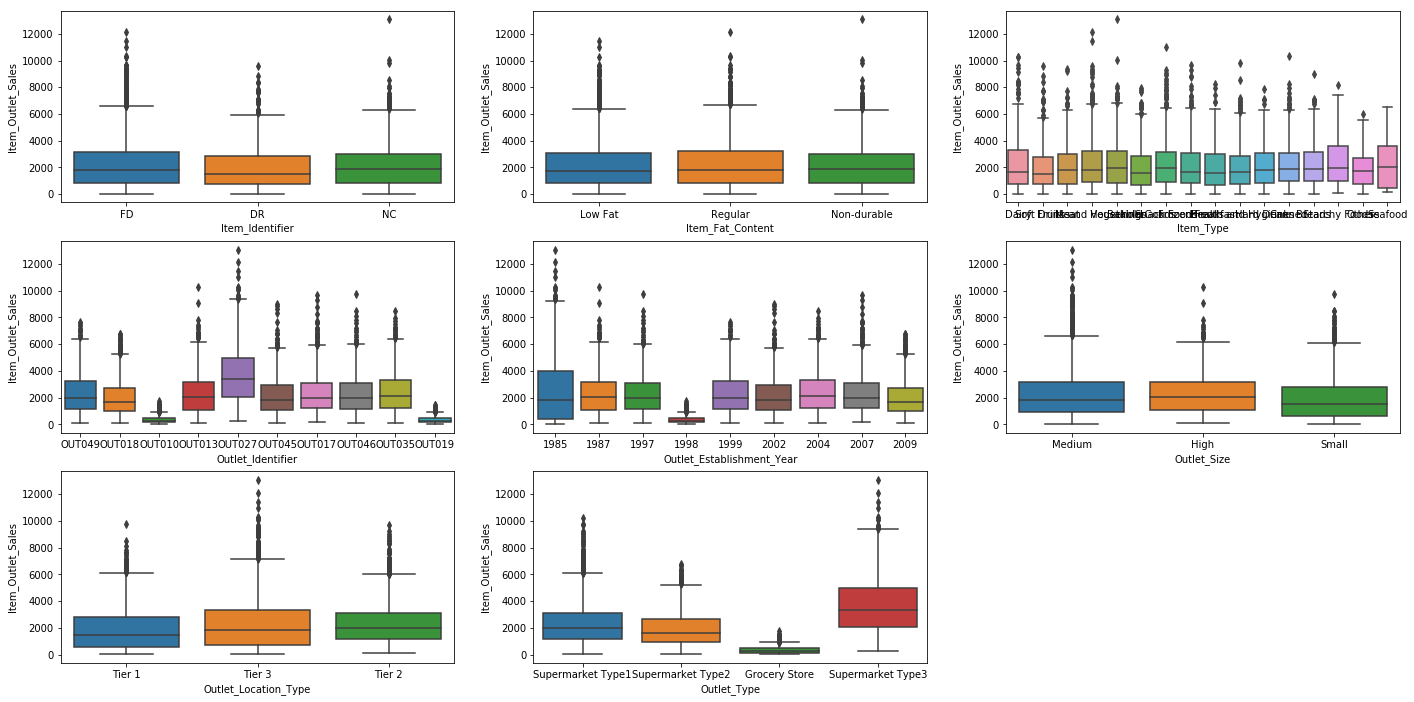

In [22]:
plt.figure(figsize= (24, 12))

for idx, col in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.boxplot(col, 'Item_Outlet_Sales', data= data)

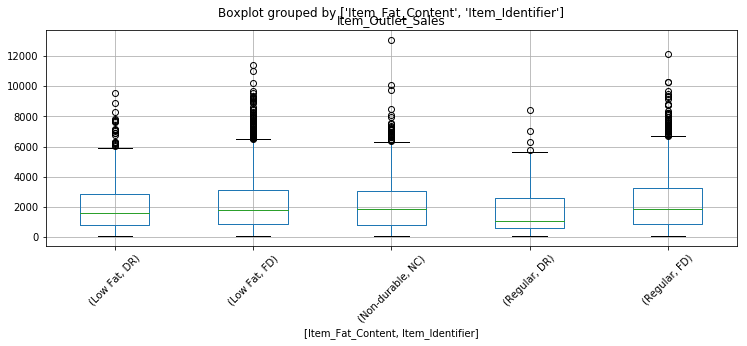

In [23]:
data.boxplot(column= 'Item_Outlet_Sales', by= ['Item_Fat_Content', 'Item_Identifier'], figsize= (12, 4), rot= 45)

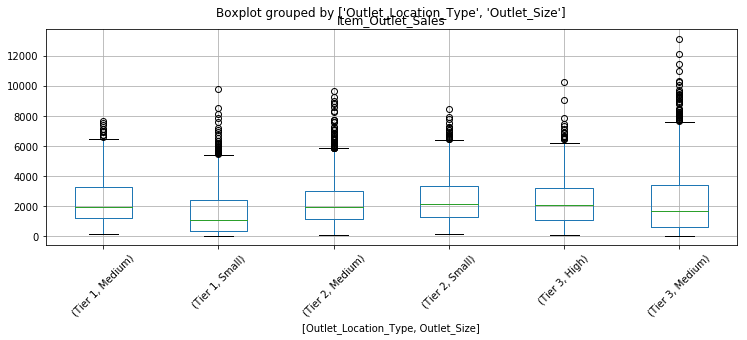

In [24]:
data.boxplot(column= 'Item_Outlet_Sales', by= ['Outlet_Location_Type', 'Outlet_Size'], figsize= (12, 4), rot= 45)

In [25]:
df= pd.get_dummies(data, drop_first= True)

In [26]:
print(df.shape)
df.head()

(8523, 47)


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non-durable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [27]:
for col in num_cols:
    
    print(f'Minimum value in {col} is: {data[col].min()}')
    print(" ")
    print(f'Minimum value in {col} is: {data[col].max()}')
    print(" ")
    

Minimum value in Item_Weight is: 4.555
 
Minimum value in Item_Weight is: 21.35
 
Minimum value in Item_Visibility is: 0.0
 
Minimum value in Item_Visibility is: 0.328390948
 
Minimum value in Item_MRP is: 31.29
 
Minimum value in Item_MRP is: 266.8884
 


In [28]:
df['Non-Visible']= np.where(df['Item_Visibility']==0, 1, 0)

df['Non-Visible'].value_counts(dropna= False)

0    7997
1     526
Name: Non-Visible, dtype: int64

In [29]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non-durable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Non-Visible
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,8.93,0.000000,53.8614,994.7052,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [30]:
df.isna().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Outlet_Sales                  0
Item_Identifier_FD                 0
Item_Identifier_NC                 0
Item_Fat_Content_Non-durable       0
Item_Fat_Content_Regular           0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
O

In [31]:
X, y= df.drop('Item_Outlet_Sales', axis= 1), df.Item_Outlet_Sales
X.shape, y.shape

((8523, 47), (8523,))

In [32]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 123)

In [34]:
lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred= lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, lr_pred)))


1113.939184607956


In [35]:
rf= RandomForestRegressor(max_depth= 5)

rf.fit(X_train, y_train)

rf_pred= rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, rf_pred)))


1074.3029529530866


In [36]:
gbm= GradientBoostingRegressor(max_depth= 2)

gbm.fit(X_train, y_train)

gbm_pred= gbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbm_pred)))


1064.0813624375799


In [37]:
from sklearn.metrics import make_scorer
# creating a custom scoring function for cross validation

def RMSE(y_true, y_pred):
    
    RMSE = np.sqrt(np.mean((y_true - y_pred) ** 2))
    
    return RMSE

rmse= make_scorer(RMSE, greater_is_better= False)
score= cross_val_score(estimator= gbm, X= X_train, y= y_train, scoring= rmse, cv= 5,\
                n_jobs= -1, verbose= 1)

score.mean(), score.std()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished


(-1086.258121167385, 34.04737756527135)

In [38]:
et= ExtraTreesRegressor()

et.fit(X_train, y_train)

et_pred= et.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, et_pred)))


1216.6413712252863


In [39]:
iso_forest= IsolationForest(contamination= 'auto', behaviour= 'New')

outliers= iso_forest.fit_predict(X, y)

pd.Series(outliers).value_counts(dropna= False)


 1    8190
-1     333
dtype: int64

In [40]:
out_bool= outliers == 1

X_new, y_new= X[out_bool], y[out_bool]

In [41]:
X_new.shape, y_new.shape

((8190, 47), (8190,))

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X_new, y_new, random_state= 123, test_size= 0.2)

In [43]:
lr= LinearRegression()

lr.fit(X_train, y_train)

lr_pred= lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, lr_pred)))

1132.0825784614174


In [44]:
rf= RandomForestRegressor(max_depth= 5)

rf.fit(X_train, y_train)

rf_pred= rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, rf_pred)))


1080.9752173836148


In [45]:
gbm= GradientBoostingRegressor(max_depth= 2)

gbm.fit(X_train, y_train)

gbm_pred= gbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbm_pred)))


1074.2750038857623


In [46]:
gbm_params= {'max_depth': np.arange(1, 10, 2), "max_features": [.7, .8, .9],
             'max_leaf_nodes': np.arange(2, 10, 2), "min_samples_leaf": np.arange(1, 10, 2),
             'min_samples_split': np.arange(2, 10, 2)}

gbm_grid= GridSearchCV(gbm, gbm_params, scoring= rmse, n_jobs= -1, cv= 3, verbose= 1)

gbm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 13.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([1, 3, 5, 7, 9]), 'max_features': [0.7, 0.8, 0.9], 'max_leaf_nodes': array([2, 4, 6, 8]), 'min_samples_leaf': array([1, 3, 5, 7, 9]), 'min_samples_split': array([2, 4, 6, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(RMSE, greater_is_better=False), verbose=1)

In [47]:
gbm_grid_pred= gbm_grid.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbm_grid_pred)))

1073.9304548686355


# We see almost the same score 